In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [52]:
df=pd.read_csv('/content/drive/MyDrive/DATASETS/heart rate.csv')

In [53]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        275 non-null    float64
 3   trtbps    260 non-null    float64
 4   chol      250 non-null    float64
 5   fbs       260 non-null    float64
 6   restecg   260 non-null    float64
 7   thalachh  293 non-null    float64
 8   exng      281 non-null    float64
 9   oldpeak   275 non-null    float64
 10  slp       253 non-null    float64
 11  caa       253 non-null    float64
 12  thall     265 non-null    float64
 13  output    303 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 33.3 KB


In [55]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,275.000000,260.000000,250.000000,260.000000,260.000000,293.000000,281.000000,275.000000,253.000000,253.000000,265.000000,303.000000
mean,54.366337,0.683168,0.949091,133.042308,246.184000,0.157692,0.519231,149.412969,0.338078,1.081455,1.383399,0.719368,2.316981,0.544554
std,9.082101,0.466011,1.034597,17.583396,49.364782,0.365155,0.530549,23.015557,0.473899,1.188134,0.610134,0.982132,0.631777,0.498835
min,29.000000,0.000000,0.000000,100.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [56]:
# Count null values for each column
null_counts = df.isnull().sum()
null_counts

,0
age,0
sex,0
cp,28
trtbps,43
chol,53
fbs,43
restecg,43
thalachh,10
exng,22
oldpeak,28


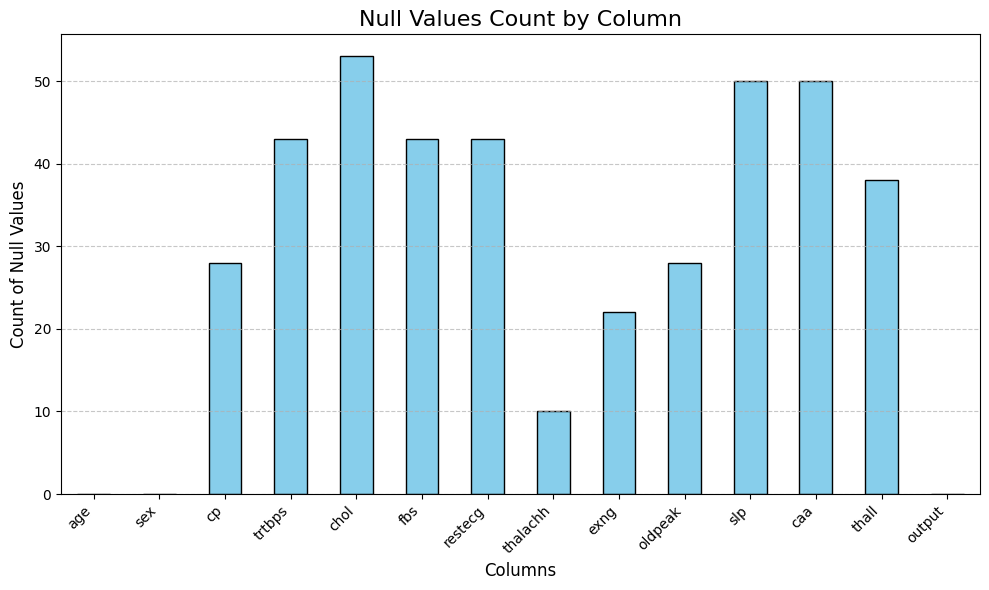

In [57]:
# Plotting the null values
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Null Values Count by Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Count of Null Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

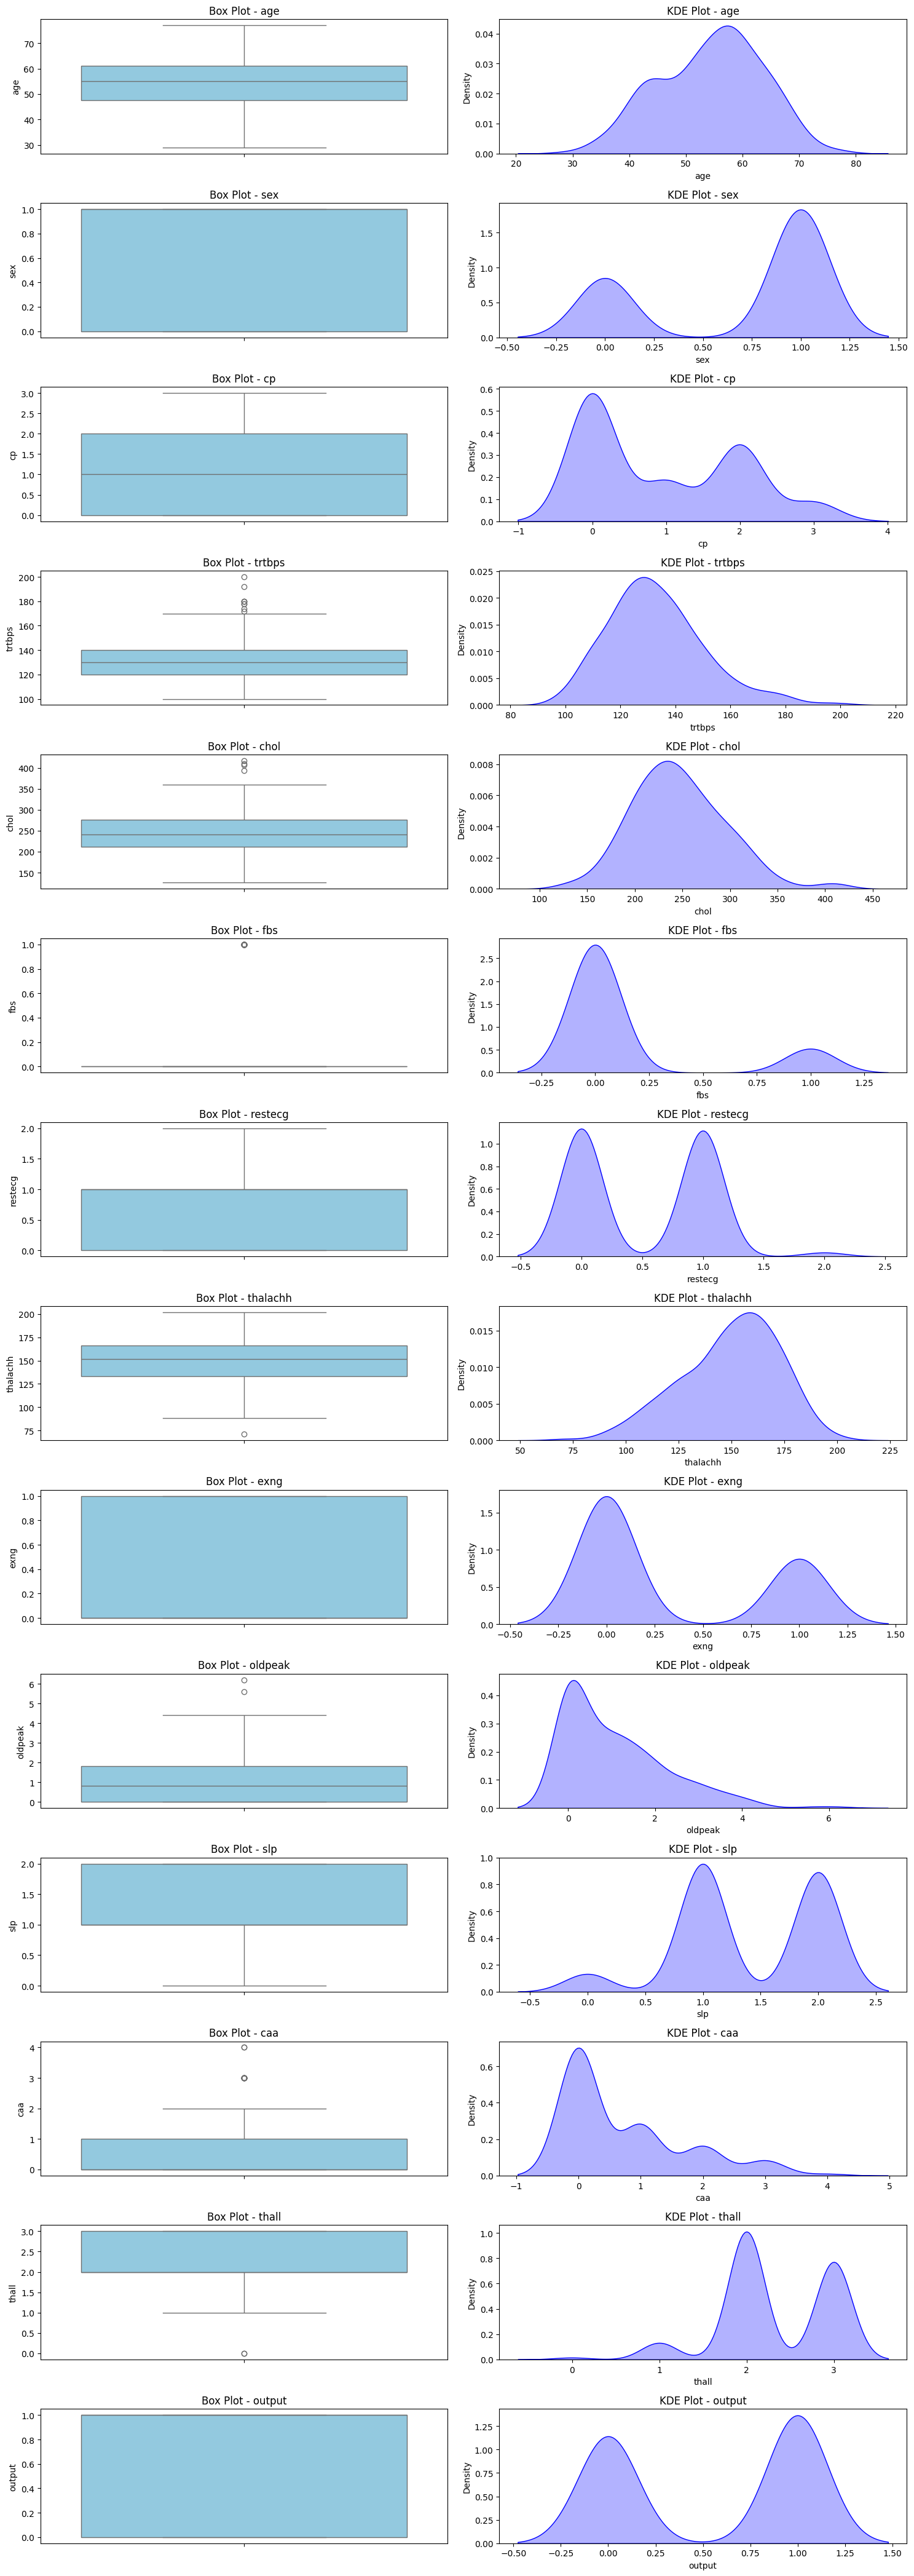

In [63]:
# Box plot for all Columns to detect outliers
numeric_columns = df.columns

# Set up the plot grid
plt.figure(figsize=(15, len(numeric_columns) * 3))  # Adjust height based on number of columns

# Create a subplot for each column
for i, col in enumerate(numeric_columns, 1):
    # Box Plot
    plt.subplot(len(numeric_columns), 2, 2 * i - 1)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Box Plot - {col}', fontsize=12)
    plt.ylabel(col, fontsize=10)
    plt.xlabel('')

    # KDE Plot
    plt.subplot(len(numeric_columns), 2, 2 * i)
    sns.kdeplot(data=df, x=col, fill=True, color='blue', alpha=0.3)
    plt.title(f'KDE Plot - {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Density', fontsize=10)

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [58]:
numeric_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

# Summary statistics for numeric columns
summary_statistics = df[numeric_columns].describe()

# Frequency tables for categorical columns
frequency_tables = {col: df[col].value_counts() for col in categorical_columns}

# Display results
print("Summary Statistics for Numeric Columns:")
print(summary_statistics)

print("\nFrequency Tables for Categorical Columns:")
for col, freq_table in frequency_tables.items():
    print(f"\nFrequency Table for {col}:")
    print(freq_table)

Summary Statistics for Numeric Columns:
              age      trtbps        chol    thalachh     oldpeak
count  303.000000  260.000000  250.000000  293.000000  275.000000
mean    54.366337  133.042308  246.184000  149.412969    1.081455
std      9.082101   17.583396   49.364782   23.015557    1.188134
min     29.000000  100.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  212.000000  133.000000    0.000000
50%     55.000000  130.000000  241.500000  152.000000    0.800000
75%     61.000000  140.000000  275.750000  166.000000    1.800000
max     77.000000  200.000000  417.000000  202.000000    6.200000

Frequency Tables for Categorical Columns:

Frequency Table for sex:
sex
1    207
0     96
Name: count, dtype: int64

Frequency Table for cp:
cp
0.0    134
2.0     80
1.0     41
3.0     20
Name: count, dtype: int64

Frequency Table for fbs:
fbs
0.0    219
1.0     41
Name: count, dtype: int64

Frequency Table for restecg:
restecg
0.0    129
1.0    127
2.0      4
Na

In [59]:
df2 = df.copy()

In [60]:
# Filling null values for cp(Chest Pain) column
most_frequent_cp = df2['cp'].mode()[0]  # Get the most frequent category
df2['cp'].fillna(most_frequent_cp, inplace=True)

<ipython-input-60-9b877ff89a8c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['cp'].fillna(most_frequent_cp, inplace=True)


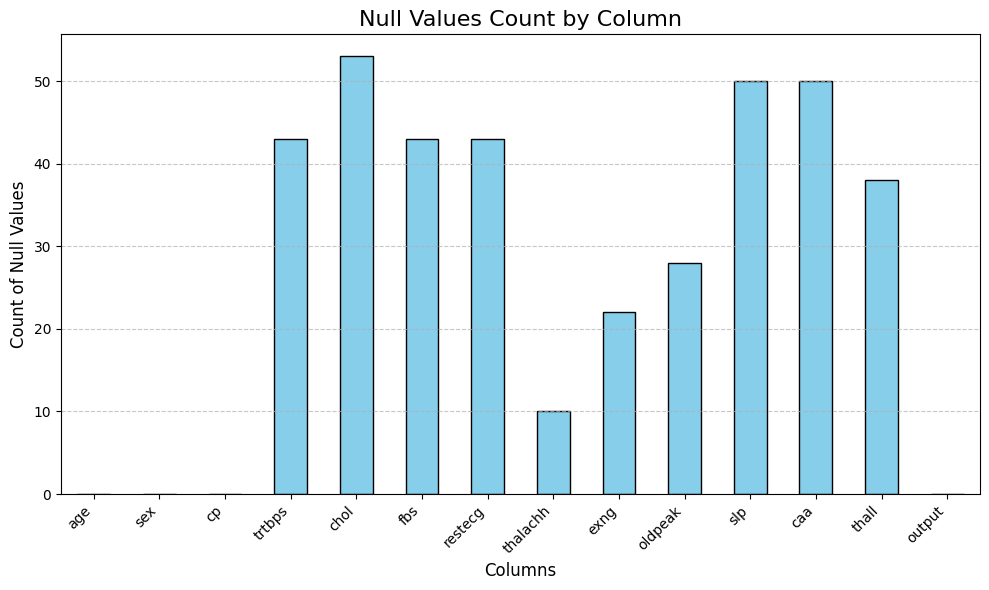

In [62]:
# Plotting the null values for cp
null_counts2 = df2.isnull().sum()
plt.figure(figsize=(10, 6))
null_counts2.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Null Values Count by Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Count of Null Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

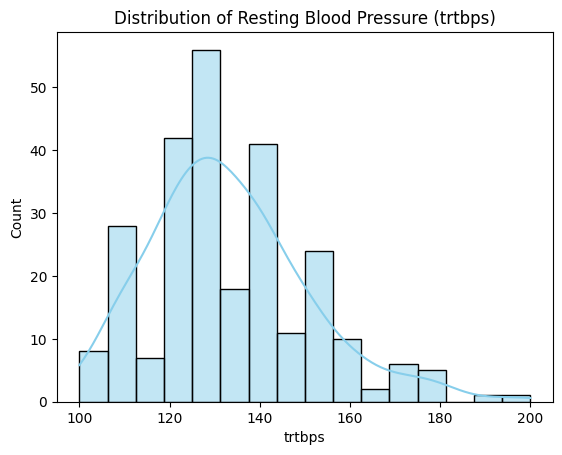

In [64]:
# examine 2nd column which consists of null values
# Distribution of Resting Blood Pressure (trtbps)
# Plot the distribution to check for skewness
sns.histplot(df2['trtbps'], kde=True, color='skyblue')
plt.title('Distribution of Resting Blood Pressure (trtbps)')
plt.show()

In [65]:
# as data is positively skewed
# Use the median, as it is less affected by outliers.
# Filling null values for trtbps(Blood Pressure)
df2['trtbps'].fillna(df2['trtbps'].median(), inplace=True)


<ipython-input-65-26ec71910002>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['trtbps'].fillna(df2['trtbps'].median(), inplace=True)


In [69]:
# Checking Null Values
df2['trtbps'].isnull().sum()

0

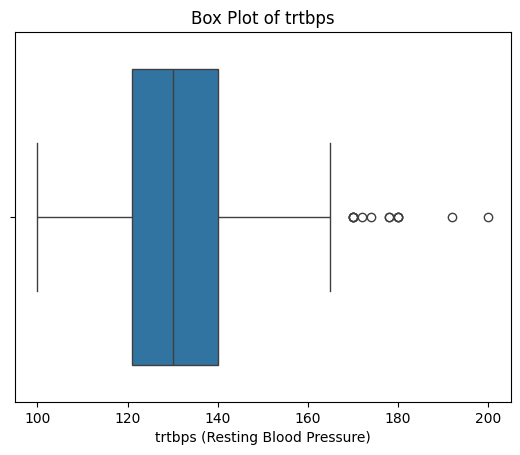

In [74]:
# Box plot for trtbps
sns.boxplot(x=df2['trtbps'])
plt.title('Box Plot of trtbps')
plt.xlabel('trtbps (Resting Blood Pressure)')
plt.show()

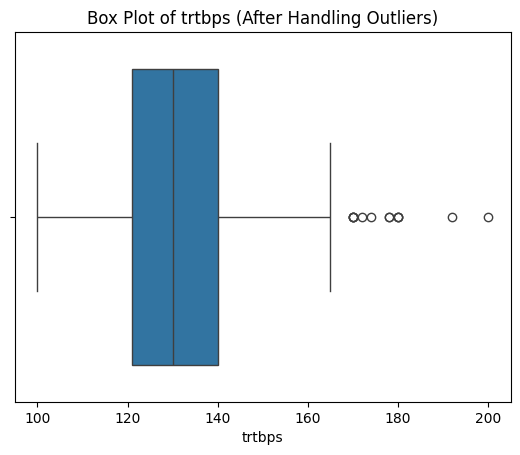

In [76]:
# 1. Identify Outliers using IQR
Q1 = df2['trtbps'].quantile(0.25)
Q3 = df2['trtbps'].quantile(0.75)
IQR = Q3 - Q1

outliers = df2[(df2['trtbps'] < Q1 - 1.5*IQR) | (df2['trtbps'] > Q3 + 1.5*IQR)]

# 2. Handle Outliers (e.g., capping)
df2['trtbps'] = df2['trtbps'].me

# 3. Visualize the Distribution After Handling Outliers
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df2['trtbps'])
plt.title('Box Plot of trtbps (After Handling Outliers)')
plt.show()

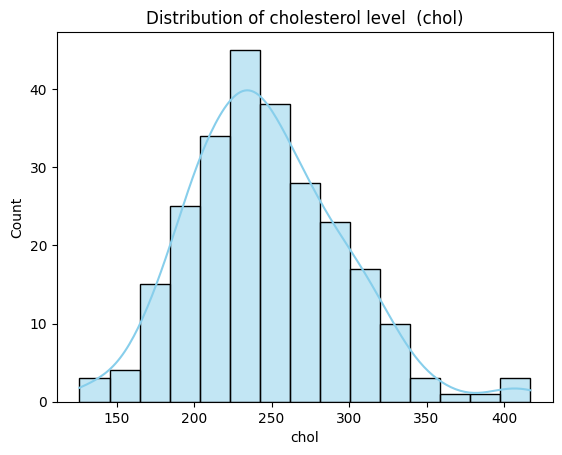

In [70]:
sns.histplot(df2['chol'], kde=True, color='skyblue')
plt.title('Distribution of cholesterol level  (chol)')
plt.show()

In [71]:
# as data is slightly positively skewed
# Use the median, as it is less affected by outliers.
# Filling null values for chol(cholesterol level )
df2['chol'].fillna(df2['chol'].median(), inplace=True)


<ipython-input-71-4e314a203367>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['chol'].fillna(df2['chol'].median(), inplace=True)


In [72]:
# Checking Null Values
df2['chol'].isnull().sum()

0

In [20]:
df.ffill(inplace=True)

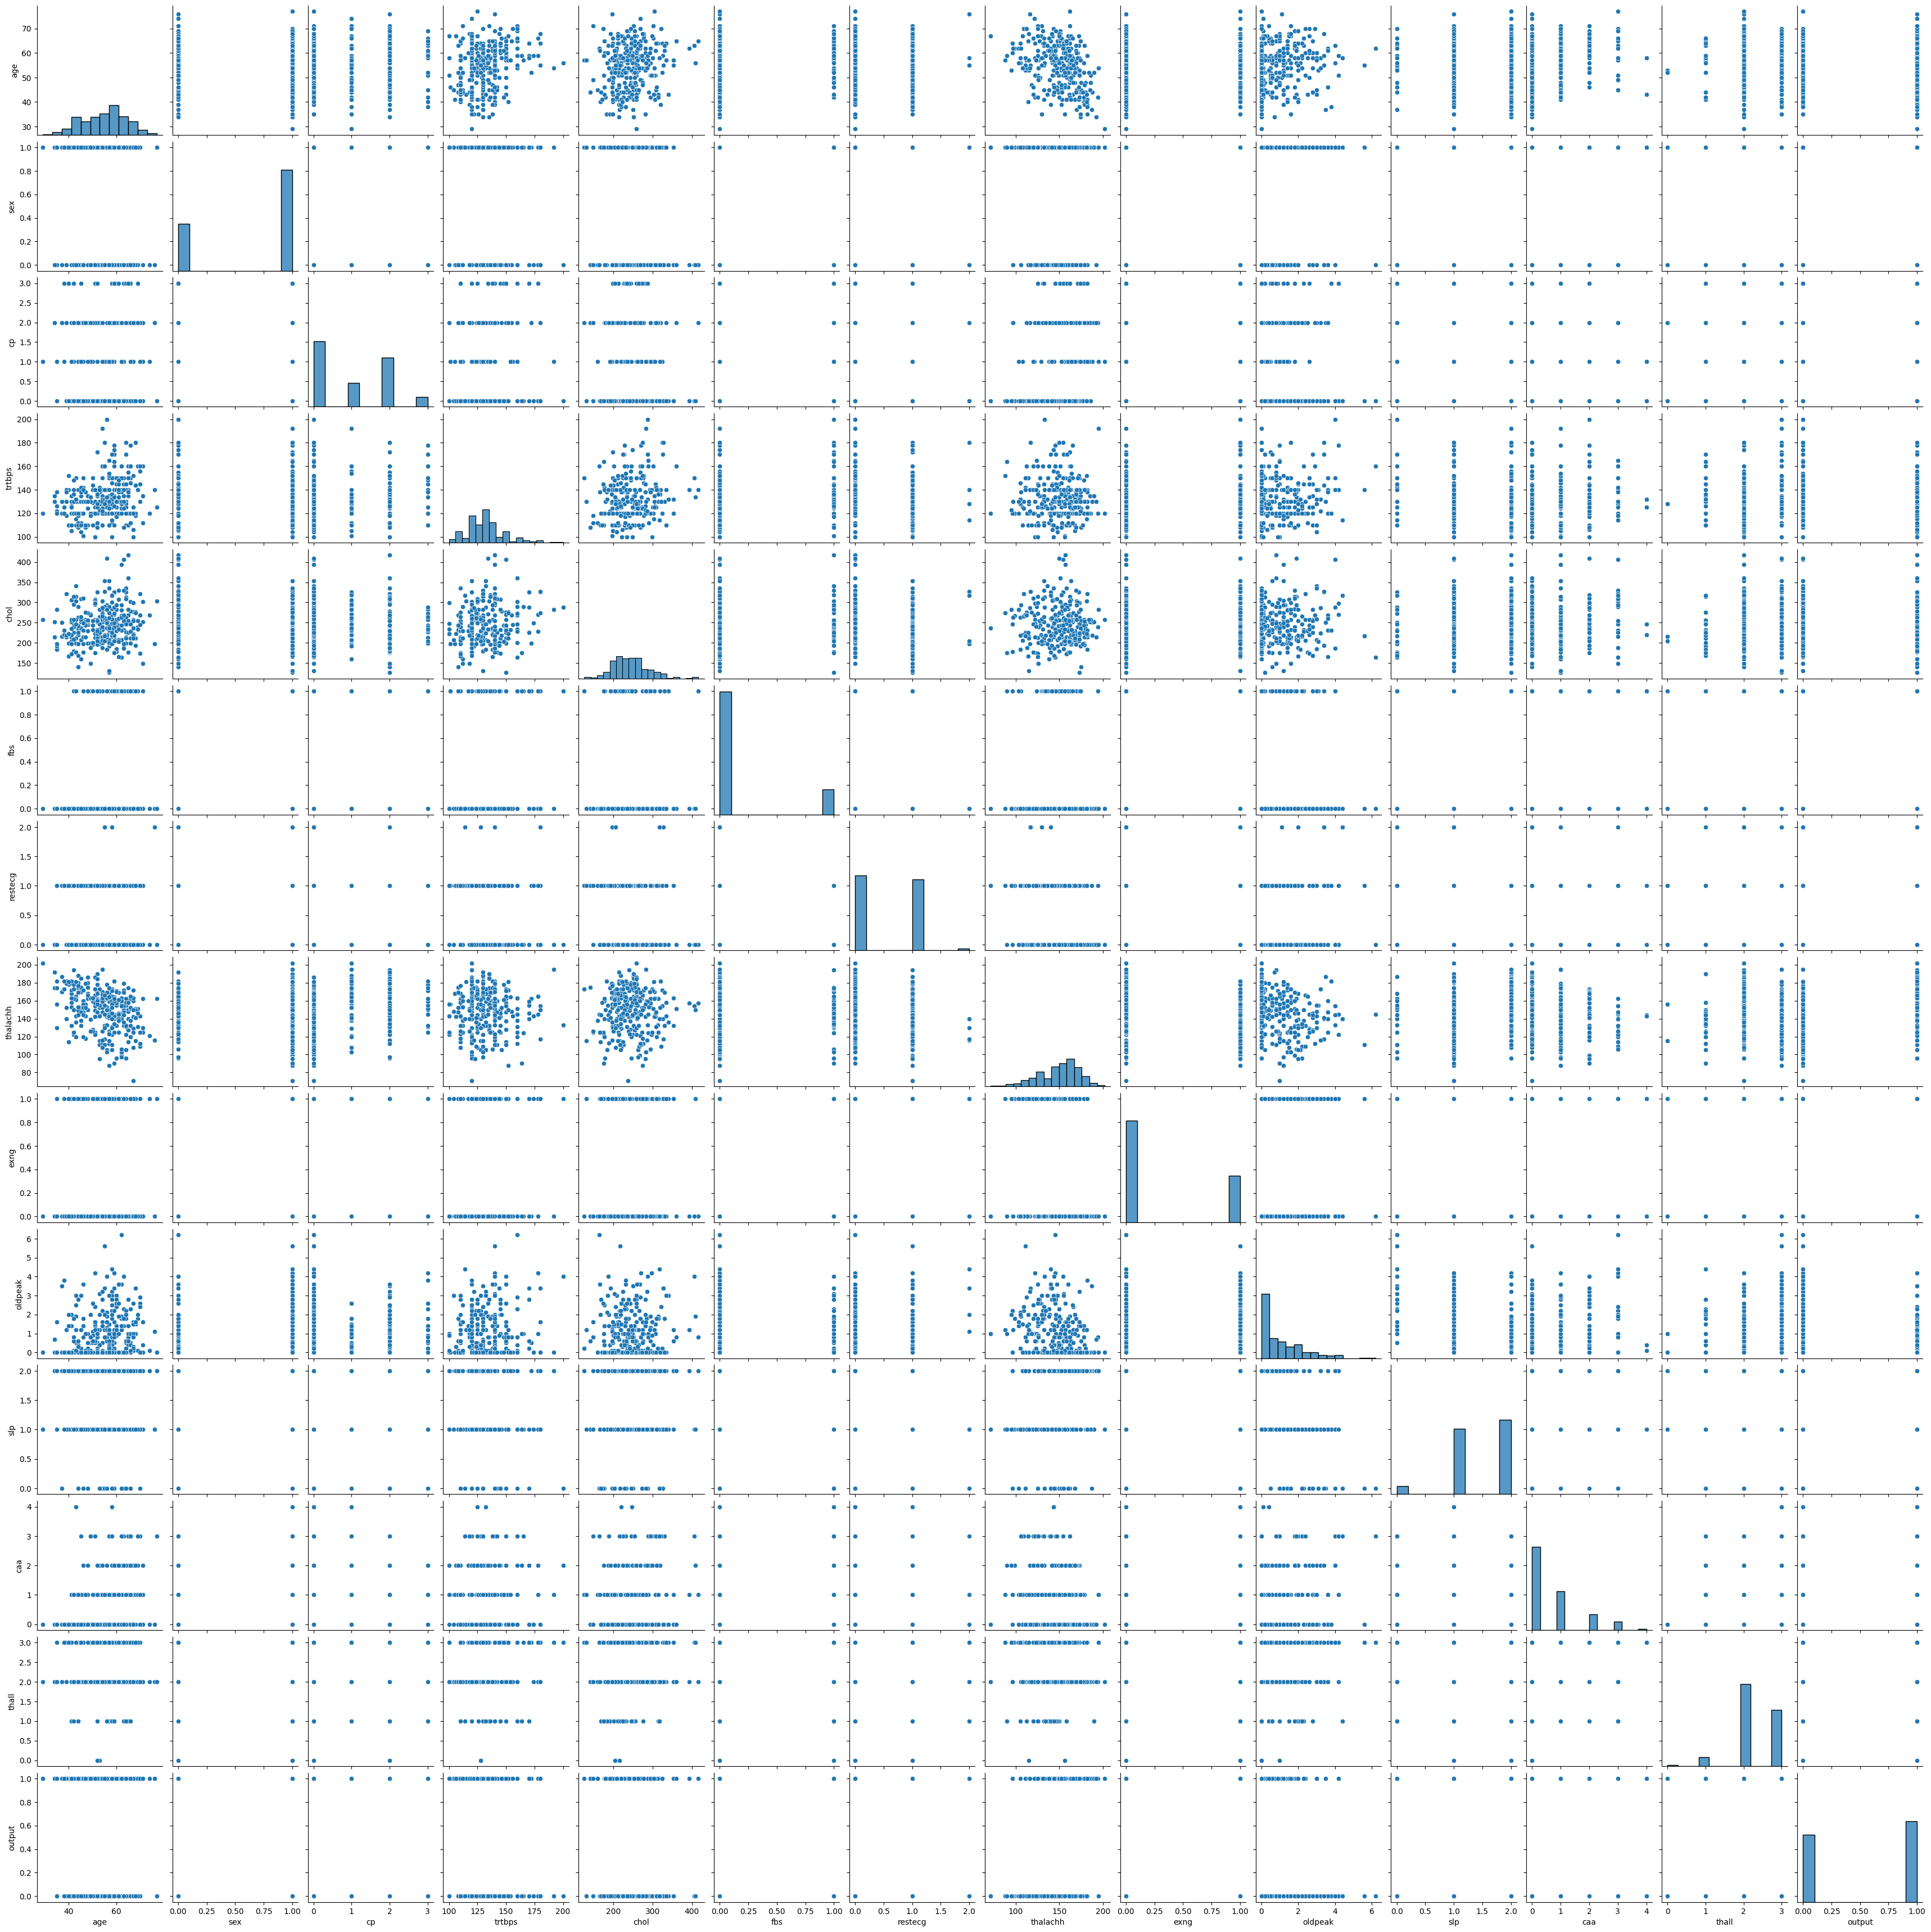

In [21]:
sns.pairplot(df)
plt.show()

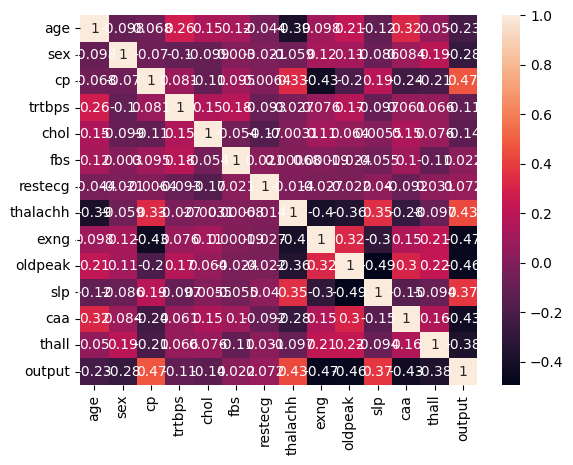

In [22]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [25]:

# Select relevant features and target variable
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = df['trtbps']

# Identify numerical and categorical features
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with the mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Create a ColumnTransformer to apply transformers to respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Add your desired model here (e.g., LinearRegression(), RandomForestClassifier())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trtbps', 'chol',
                                                   'thalachh', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exng', 'slp',
                                                   'caa', 'thall'])]))])

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 1.1984478329285509e-27
Root Mean Squared Error: 3.461860530016411e-14
R-squared Score: 1.0
